<a href="https://colab.research.google.com/github/frypan05/2LayerNeuralNet/blob/main/LAB_2_LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]


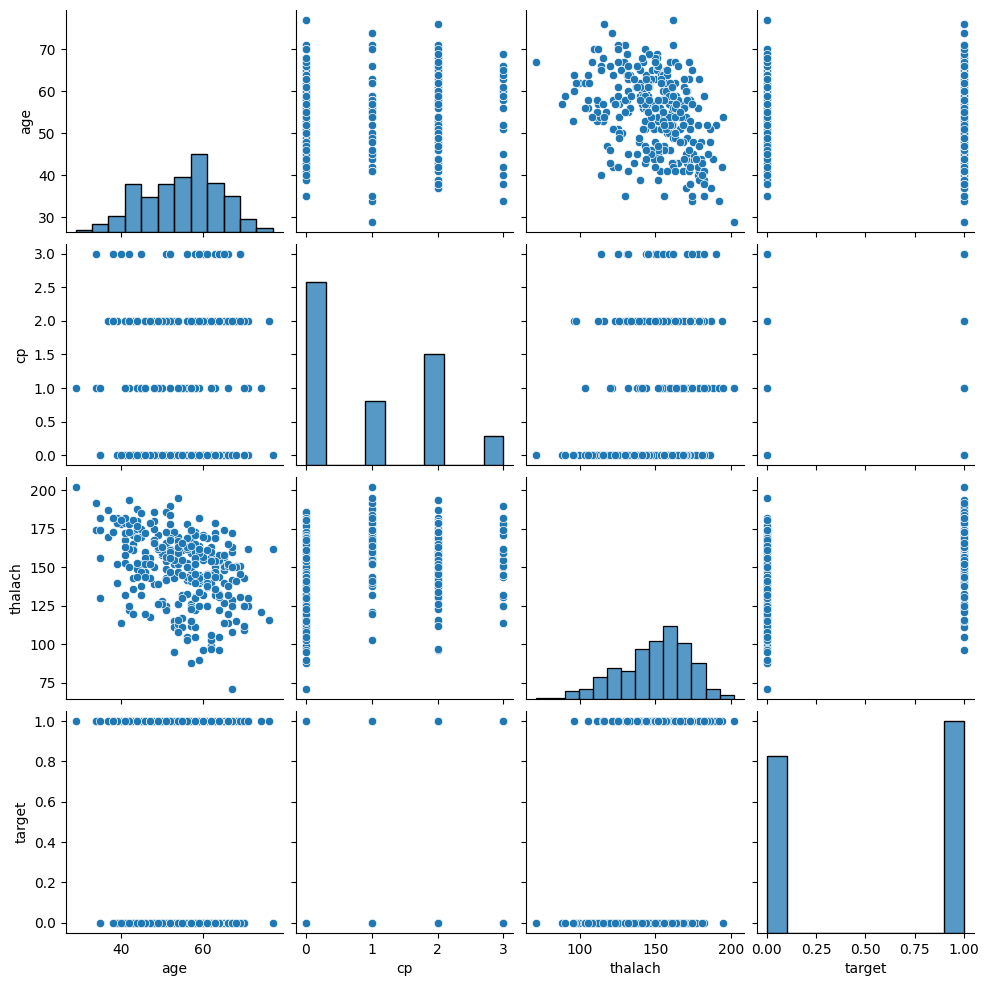

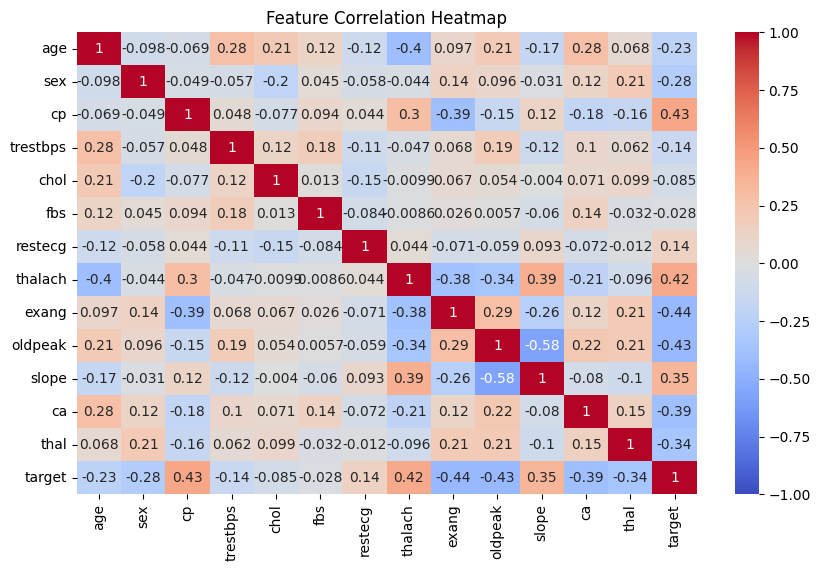

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



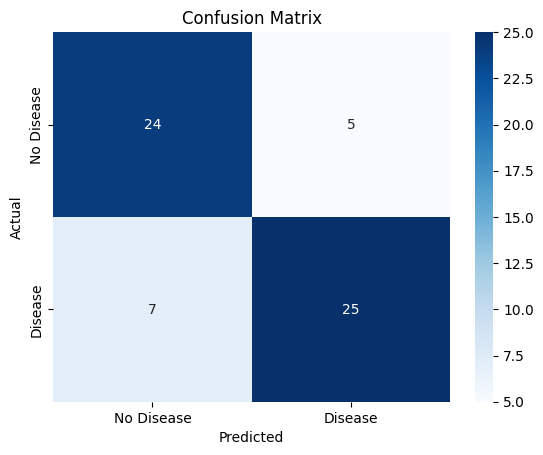

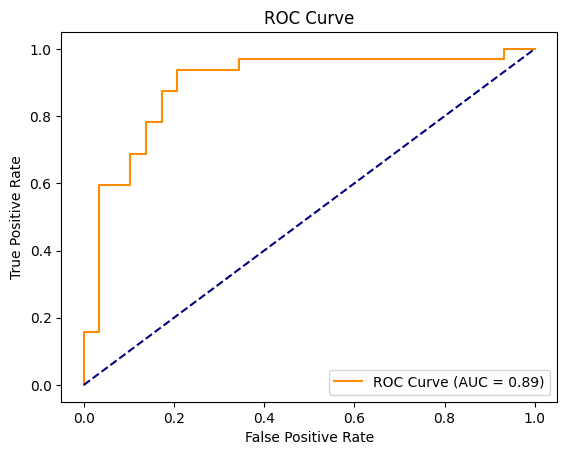

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score, classification_report

# Load data (replace with actual file path)
df = pd.read_csv('/heart_disease.csv')

# EDA (Exploratory Data Analysis)
print(df.describe())  # Check summary statistics
sns.pairplot(df[['age', 'cp', 'thalach', 'target']])
plt.show()

# Heatmap to show correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

# Feature and target selection
X = df[['age', 'cp', 'thalach']]
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization and training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and performance metrics
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Model performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# User input function for prediction
def predict_heart_disease():
    age = int(input("Enter age: "))
    cp = int(input("Enter chest pain type (0-3): "))
    thalach = int(input("Enter maximum heart rate achieved: "))

    user_data = pd.DataFrame([[age, cp, thalach]], columns=['age', 'cp', 'thalach'])
    prediction = model.predict(user_data)

    result = "Heart Disease Present" if prediction[0] == 1 else "No Heart Disease"
    print(f"Prediction: {result}")

# Call the user input function to test
predict_heart_disease()